In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

In [61]:
BookMeta = pd.read_csv('data (book popularity)\data\SPGC-metadata-2018-07-18.csv')
BookKLD = pd.read_csv('data (book popularity)\data\KLDscores.csv')
BookAtt = pd.read_csv('data (book popularity)\data\extra_controls.csv')

In [62]:
print(BookMeta.info())
BookMeta.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57713 entries, 0 to 57712
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 57713 non-null  object 
 1   title              57642 non-null  object 
 2   author             55451 non-null  object 
 3   authoryearofbirth  42946 non-null  float64
 4   authoryearofdeath  41850 non-null  float64
 5   language           57711 non-null  object 
 6   downloads          57711 non-null  float64
 7   subjects           57713 non-null  object 
 8   type               57713 non-null  object 
dtypes: float64(3), object(6)
memory usage: 4.0+ MB
None


,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
0,PG0,NaN,NaN,NaN,NaN,NaN,NaN,set(),Text
1,PG1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],604.0,"{'United States -- History -- Revolution, 1775...",Text
2,PG2,The United States Bill of Rights: The Ten Orig...,United States,NaN,NaN,['en'],158.0,"{'Civil rights -- United States -- Sources', '...",Text
3,PG3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],28.0,{'Presidents -- United States -- Inaugural add...,Text
4,PG4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],55.0,{'Consecration of cemeteries -- Pennsylvania -...,Text


In [63]:
print(BookKLD)
BookKLD.head()

      filename                                         kld_values
0      PG10002  [0.22391005737243896, 0.24226261808703536, 0.2...
1      PG10005  [0.24107767463211327, 0.24747085497572513, 0.2...
2      PG10003  [0.2502283960399736, 0.2304129699198611, 0.238...
3      PG10008  [0.2576982842724978, 0.2424932127358288, 0.220...
4      PG10012  [0.25125974534678364, 0.23622148585532693, 0.2...
...        ...                                                ...
23188   PG9971  [0.22838257901564088, 0.21120893011566938, 0.2...
23189   PG9993  [0.2471592500558816, 0.1970731579466416, 0.291...
23190   PG9983  [0.21198661056119145, 0.21617505920334878, 0.2...
23191    PG996  [0.24116003079407344, 0.21510152162479515, 0.2...
23192    PG673  [0.20625582936128445, 0.20509986575511333, 0.1...

[23193 rows x 2 columns]


,filename,kld_values
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2..."
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2..."
2,PG10003,"[0.2502283960399736, 0.2304129699198611, 0.238..."
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220..."
4,PG10012,"[0.25125974534678364, 0.23622148585532693, 0.2..."


In [64]:
print(BookAtt.info())
BookAtt.head()

BookAtt.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18726 entries, 0 to 18725
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18726 non-null  object 
 1   subj2_war             18726 non-null  int64  
 2   subj2_adventure       18726 non-null  int64  
 3   subj2_comedy          18726 non-null  int64  
 4   subj2_biography       18726 non-null  int64  
 5   subj2_romance         18726 non-null  int64  
 6   subj2_drama           18726 non-null  int64  
 7   subj2_fantasy         18726 non-null  int64  
 8   subj2_family          18726 non-null  int64  
 9   subj2_sciencefiction  18726 non-null  int64  
 10  subj2_action          18726 non-null  int64  
 11  subj2_thriller        18726 non-null  int64  
 12  subj2_western         18726 non-null  int64  
 13  subj2_horror          18726 non-null  int64  
 14  subj2_mystery         18726 non-null  int64  
 15  subj2_crime        

Index(['id', 'subj2_war', 'subj2_adventure', 'subj2_comedy', 'subj2_biography',
       'subj2_romance', 'subj2_drama', 'subj2_fantasy', 'subj2_family',
       'subj2_sciencefiction', 'subj2_action', 'subj2_thriller',
       'subj2_western', 'subj2_horror', 'subj2_mystery', 'subj2_crime',
       'subj2_history', 'subj2_periodicals', 'subj2_others', 'speed',
       'sentiment_avg', 'sentiment_vol', 'wordcount'],
      dtype='object')

In [65]:
BookKLD['kld_values'] = BookKLD['kld_values'].apply(lambda x: [float(i.replace('[','').replace(']','').replace(',','').replace('\'','')) for i in x.split(' ')])
BookKLD

,filename,kld_values
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2..."
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2..."
2,PG10003,"[0.2502283960399736, 0.2304129699198611, 0.238..."
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220..."
4,PG10012,"[0.25125974534678364, 0.23622148585532693, 0.2..."
...,...,...
23188,PG9971,"[0.22838257901564088, 0.21120893011566938, 0.2..."
23189,PG9993,"[0.2471592500558816, 0.1970731579466416, 0.291..."
23190,PG9983,"[0.21198661056119145, 0.21617505920334878, 0.2..."
23191,PG996,"[0.24116003079407344, 0.21510152162479515, 0.2..."


In [66]:
BookKLD['Average'] = BookKLD['kld_values'].apply(lambda x: np.mean(x))
BookKLD['Std'] = BookKLD['kld_values'].apply(lambda x: np.std(x))
BookKLD['Variance'] = BookKLD['kld_values'].apply(lambda x: np.std(x)**2)
BookKLD['Slope'] = BookKLD['kld_values'].apply(lambda x: np.polyfit(np.arange(len(x)),x,1)[0])
BookKLD['Skew'] = BookKLD['kld_values'].apply(lambda x: pd.Series(x).skew())

BookKLD.head()


,filename,kld_values,Average,Std,Variance,Slope,Skew
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2...",0.234033,0.040543,0.001644,0.000870,3.316462
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2...",0.243351,0.033243,0.001105,0.000143,1.935851
2,PG10003,"[0.2502283960399736, 0.2304129699198611, 0.238...",0.241611,0.059772,0.003573,0.001259,4.264265
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220...",0.240153,0.047394,0.002246,0.000813,5.790988
4,PG10012,"[0.25125974534678364, 0.23622148585532693, 0.2...",0.226469,0.015966,0.000255,0.000054,0.216021


In [67]:
Book = pd.merge(BookMeta, BookKLD, left_on='id', right_on='filename', how='inner').drop(columns=['filename'])


In [68]:
print(Book.info())
Book.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18988 entries, 0 to 18987
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18988 non-null  object 
 1   title              18988 non-null  object 
 2   author             18164 non-null  object 
 3   authoryearofbirth  15109 non-null  float64
 4   authoryearofdeath  14853 non-null  float64
 5   language           18988 non-null  object 
 6   downloads          18988 non-null  float64
 7   subjects           18988 non-null  object 
 8   type               18988 non-null  object 
 9   kld_values         18988 non-null  object 
 10  Average            18988 non-null  float64
 11  Std                18988 non-null  float64
 12  Variance           18988 non-null  float64
 13  Slope              18988 non-null  float64
 14  Skew               18988 non-null  float64
dtypes: float64(8), object(7)
memory usage: 2.2+ MB
None


,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type,kld_values,Average,Std,Variance,Slope,Skew
0,PG25,The 1991 CIA World Factbook,United States. Central Intelligence Agency,NaN,NaN,['en'],53.0,"{'Political statistics -- Handbooks, manuals, ...",Text,"[0.27372407402192245, 0.25156598695740634, 0.2...",0.248015,0.040157,1.612574e-03,1.178587e-03,3.489357
1,PG38,"The Jargon File, Version 2.9.10, 01 Jul 1992",NaN,NaN,NaN,['en'],49.0,{'Electronic data processing -- Terminology --...,Text,"[0.2694090635592844, 0.2228887493335846, 0.262...",0.238106,0.026578,7.064128e-04,4.659172e-04,3.113077
2,PG48,The 1992 CIA World Factbook,United States. Central Intelligence Agency,NaN,NaN,['en'],35.0,"{'Political statistics -- Handbooks, manuals, ...",Text,"[0.24616216720028516, 0.2335522380106473, 0.25...",0.251792,0.031782,1.010118e-03,9.985017e-04,3.287012
3,PG50,Pi,"Hemphill, Scott",NaN,NaN,['en'],87.0,"{'Pi', 'Mathematics'}",Dataset,"[0.24114507546033045, 0.23104906018664845, 0.2...",0.231255,0.001427,2.037741e-06,-2.472494e-05,7.000000
4,PG65,"The First 100,000 Prime Numbers",Unknown,NaN,NaN,['en'],48.0,"{'Numbers, Prime', 'Mathematics'}",Dataset,"[0.2313005764267122, 0.23104906018664845, 0.23...",0.231054,0.000036,1.264681e-09,-6.159581e-07,7.000000


In [69]:
BookCopy =  Book.copy()

In [70]:
scaleCols = ['Average', 'Std', 'Variance', 'Slope', 'Skew']
scaler = StandardScaler()


Book[scaleCols] = scaler.fit_transform(Book[scaleCols])

In [71]:
Book.info()
Book.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18988 entries, 0 to 18987
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18988 non-null  object 
 1   title              18988 non-null  object 
 2   author             18164 non-null  object 
 3   authoryearofbirth  15109 non-null  float64
 4   authoryearofdeath  14853 non-null  float64
 5   language           18988 non-null  object 
 6   downloads          18988 non-null  float64
 7   subjects           18988 non-null  object 
 8   type               18988 non-null  object 
 9   kld_values         18988 non-null  object 
 10  Average            18988 non-null  float64
 11  Std                18988 non-null  float64
 12  Variance           18988 non-null  float64
 13  Slope              18988 non-null  float64
 14  Skew               18988 non-null  float64
dtypes: float64(8), object(7)
memory usage: 2.2+ MB


,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type,kld_values,Average,Std,Variance,Slope,Skew
0,PG25,The 1991 CIA World Factbook,United States. Central Intelligence Agency,NaN,NaN,['en'],53.0,"{'Political statistics -- Handbooks, manuals, ...",Text,"[0.27372407402192245, 0.25156598695740634, 0.2...",0.241782,0.279736,0.022350,1.244000,1.109349
1,PG38,"The Jargon File, Version 2.9.10, 01 Jul 1992",NaN,NaN,NaN,['en'],49.0,{'Electronic data processing -- Terminology --...,Text,"[0.2694090635592844, 0.2228887493335846, 0.262...",-0.262937,-0.483722,-0.323829,0.115726,0.824487
2,PG48,The 1992 CIA World Factbook,United States. Central Intelligence Agency,NaN,NaN,['en'],35.0,"{'Political statistics -- Handbooks, manuals, ...",Text,"[0.24616216720028516, 0.2335522380106473, 0.25...",0.434160,-0.191128,-0.207805,0.958896,0.956164
3,PG50,Pi,"Hemphill, Scott",NaN,NaN,['en'],87.0,"{'Pi', 'Mathematics'}",Dataset,"[0.24114507546033045, 0.23104906018664845, 0.2...",-0.611877,-1.897852,-0.592921,-0.661042,3.767080
4,PG65,"The First 100,000 Prime Numbers",Unknown,NaN,NaN,['en'],48.0,"{'Numbers, Prime', 'Mathematics'}",Dataset,"[0.2313005764267122, 0.23104906018664845, 0.23...",-0.622110,-1.976115,-0.593699,-0.622874,3.767080


In [72]:
BookforReg = Book[Book['downloads'].notna()]
BookforReg['downloads'] = BookforReg['downloads'] + 1 #handling 0 entries


In [73]:

features = BookforReg[['Average', 'Variance', 'Slope', 'Skew']]
target = np.log(BookforReg['downloads'])

In [74]:

reg = LinearRegression()


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)

print('mean_squared_error', mse)

mean_squared_error 1.2323302014702233


In [75]:


# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

reg = RandomForestRegressor(random_state=42)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)

print('mse', mse)

mse 1.302967970282317


In [76]:
Book

,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type,kld_values,Average,Std,Variance,Slope,Skew
0,PG25,The 1991 CIA World Factbook,United States. Central Intelligence Agency,NaN,NaN,['en'],53.0,"{'Political statistics -- Handbooks, manuals, ...",Text,"[0.27372407402192245, 0.25156598695740634, 0.2...",0.241782,0.279736,0.022350,1.244000,1.109349
1,PG38,"The Jargon File, Version 2.9.10, 01 Jul 1992",NaN,NaN,NaN,['en'],49.0,{'Electronic data processing -- Terminology --...,Text,"[0.2694090635592844, 0.2228887493335846, 0.262...",-0.262937,-0.483722,-0.323829,0.115726,0.824487
2,PG48,The 1992 CIA World Factbook,United States. Central Intelligence Agency,NaN,NaN,['en'],35.0,"{'Political statistics -- Handbooks, manuals, ...",Text,"[0.24616216720028516, 0.2335522380106473, 0.25...",0.434160,-0.191128,-0.207805,0.958896,0.956164
3,PG50,Pi,"Hemphill, Scott",NaN,NaN,['en'],87.0,"{'Pi', 'Mathematics'}",Dataset,"[0.24114507546033045, 0.23104906018664845, 0.2...",-0.611877,-1.897852,-0.592921,-0.661042,3.767080
4,PG65,"The First 100,000 Prime Numbers",Unknown,NaN,NaN,['en'],48.0,"{'Numbers, Prime', 'Mathematics'}",Dataset,"[0.2313005764267122, 0.23104906018664845, 0.23...",-0.622110,-1.976115,-0.593699,-0.622874,3.767080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18983,PG57701,The History of Duelling (Volume 2 of 2),"Millingen, J. G. (John Gideon)",1782.0,1862.0,['en'],80.0,set(),Text,"[0.3798380680216496, 0.26250209092104904, 0.23...",1.166289,0.100881,-0.071385,-0.686302,-0.824426
18984,PG57705,"An Universal Dictionary of the Marine: Or, a C...","Falconer, William",1732.0,1769.0,['en'],0.0,set(),Text,"[0.3023203655578304, 0.22378321202580767, 0.24...",-0.843353,-0.549805,-0.347169,-1.325560,-0.402503
18985,PG57709,The American Indian in the United States: Peri...,"Moorehead, Warren K.",NaN,NaN,['en'],0.0,set(),Text,"[0.26009914908000686, 0.2496737120520522, 0.24...",0.777721,1.842413,1.170193,1.502882,1.420399
18986,PG57710,A Son of the State,"Ridge, W. Pett (William Pett)",NaN,1930.0,['en'],0.0,set(),Text,"[0.25942302871143996, 0.26475610039264486, 0.2...",0.088312,-0.893502,-0.451540,-0.853268,-1.296230


In [77]:
BookMeta

,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
0,PG0,NaN,NaN,NaN,NaN,NaN,NaN,set(),Text
1,PG1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],604.0,"{'United States -- History -- Revolution, 1775...",Text
2,PG2,The United States Bill of Rights: The Ten Orig...,United States,NaN,NaN,['en'],158.0,"{'Civil rights -- United States -- Sources', '...",Text
3,PG3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],28.0,{'Presidents -- United States -- Inaugural add...,Text
4,PG4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],55.0,{'Consecration of cemeteries -- Pennsylvania -...,Text
...,...,...,...,...,...,...,...,...,...
57708,PG57710,A Son of the State,"Ridge, W. Pett (William Pett)",NaN,1930.0,['en'],0.0,set(),Text
57709,PG57711,Hudson Tercentenary: An historical retrospect ...,"Chamberlain, Frank",NaN,NaN,['en'],0.0,set(),Text
57710,PG57712,Proses moroses,"Gourmont, Remy de",1858.0,1915.0,['fr'],0.0,set(),Text
57711,PG57713,The Animal Parasites of Man,"Theobald, F. V.",NaN,NaN,['en'],0.0,set(),Text


In [78]:
BookAtt

,id,subj2_war,subj2_adventure,subj2_comedy,subj2_biography,subj2_romance,subj2_drama,subj2_fantasy,subj2_family,subj2_sciencefiction,...,subj2_horror,subj2_mystery,subj2_crime,subj2_history,subj2_periodicals,subj2_others,speed,sentiment_avg,sentiment_vol,wordcount
0,PG10002,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.224141,0.08737,0.002701,50831.0
1,PG10005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.221966,0.13182,0.003394,70142.0
2,PG10006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.388199,0.18372,0.001003,13193.0
3,PG10007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.301656,0.15722,0.002895,27980.0
4,PG10008,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.204838,0.10778,0.003655,65421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18721,PG9986,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.180942,0.14979,0.006868,85950.0
18722,PG9988,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.236141,0.13800,0.002923,47645.0
18723,PG9990,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.212310,0.14208,0.004579,54820.0
18724,PG9991,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.295010,0.11653,0.002811,26606.0


In [79]:
Book1 = pd.merge(BookMeta, BookKLD, left_on='id', right_on='filename', how='inner').drop(columns=['filename'])
BookwithAtt = pd.merge(Book1, BookAtt, left_on='id', right_on='id', how='inner')
BookwithAttCopy = BookwithAtt.copy()
BookwithAtt

,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type,kld_values,...,subj2_horror,subj2_mystery,subj2_crime,subj2_history,subj2_periodicals,subj2_others,speed,sentiment_avg,sentiment_vol,wordcount
0,PG79,Terminal Compromise,"Schwartau, Winn",NaN,NaN,['en'],21.0,"{'Computer security -- Fiction', 'Didactic fic...",Text,"[0.2757379259625541, 0.24798943716089544, 0.27...",...,0,0,0,0,0,1,0.171519,0.12578,0.007630,209058.0
1,PG102,The Tragedy of Pudd'nhead Wilson,"Twain, Mark",1835.0,1910.0,['en'],677.0,"{'Trials (Murder) -- Fiction', 'Impostors and ...",Text,"[0.279944221642895, 0.2578040453491282, 0.2843...",...,0,0,0,0,0,1,0.248672,0.13318,0.004250,52465.0
2,PG105,Persuasion,"Austen, Jane",1775.0,1817.0,['en'],2778.0,"{'Regency fiction', 'Ship captains -- Fiction'...",Text,"[0.216724940056036, 0.2165917910773945, 0.2422...",...,0,0,0,0,0,0,0.175747,0.16867,0.005280,82944.0
3,PG106,Jungle Tales of Tarzan,"Burroughs, Edgar Rice",1875.0,1950.0,['en'],225.0,"{'Tarzan (Fictitious character) -- Fiction', '...",Text,"[0.21957989250542345, 0.20715649423990418, 0.2...",...,0,0,0,0,0,0,0.209854,0.10250,0.004305,73714.0
4,PG107,Far from the Madding Crowd,"Hardy, Thomas",1840.0,1928.0,['en'],555.0,"{'Love stories', 'Wessex (England) -- Fiction'...",Text,"[0.22957419343700353, 0.20965547352173658, 0.2...",...,0,0,0,0,0,0,0.167575,0.12513,0.007081,136528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,PG56752,Double Play: A Story of School and Baseball,"Barbour, Ralph Henry",1870.0,1944.0,['en'],18.0,"{'Baseball -- Juvenile fiction', 'Baseball sto...",Text,"[0.23726776508309688, 0.25779721452897975, 0.2...",...,0,0,0,0,0,1,0.229725,0.14420,0.004134,67219.0
8545,PG56870,Tales from Gorky,"Gorky, Maksim",1868.0,1936.0,['en'],50.0,"{'Short stories, Russian -- Translations into ...",Text,"[0.22650213276975628, 0.25882154623059206, 0.2...",...,0,0,0,0,0,1,0.218492,0.13157,0.004209,63467.0
8546,PG57137,"Barry Wynn: Or, The Adventures of a Page Boy i...","Barton, George",1866.0,1940.0,['en'],66.0,{'Capitol pages -- Fiction'},Text,"[0.26118043436857097, 0.2377733306258158, 0.22...",...,0,0,0,0,0,1,0.221373,0.14581,0.004023,55711.0
8547,PG57166,Just a Girl,"Garvice, Charles",1850.0,1920.0,['en'],61.0,{'English fiction -- 19th century'},Text,"[0.23684874296548403, 0.23642848573061798, 0.2...",...,0,0,0,0,0,1,0.162528,0.15964,0.009051,144734.0


In [80]:
scaleCols = ['Average', 'Std', 'Variance', 'Slope', 'Skew', 'speed','sentiment_avg','sentiment_vol','wordcount']
scaler = StandardScaler()

BookwithAtt[scaleCols] = scaler.fit_transform(BookwithAtt[scaleCols])



-1.8848918103110628


In [91]:
BookAvgDown = BookwithAttCopy.copy()
print(min(BookAvgDown['speed']))

0.063853517


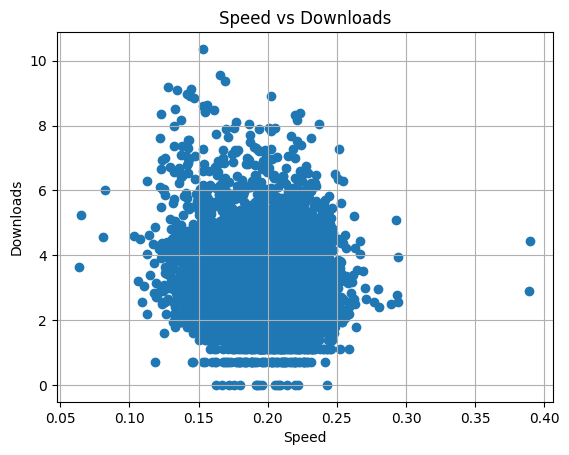

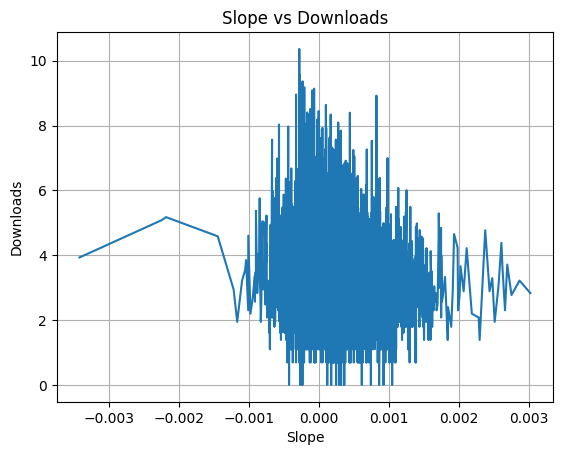

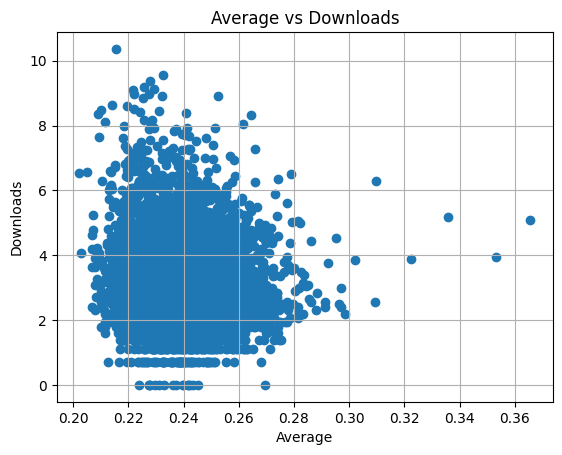

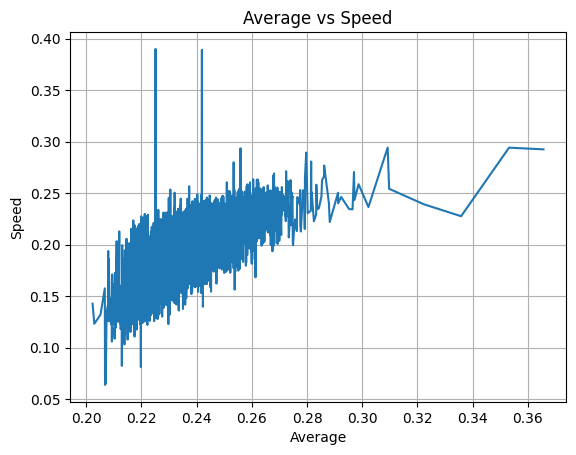

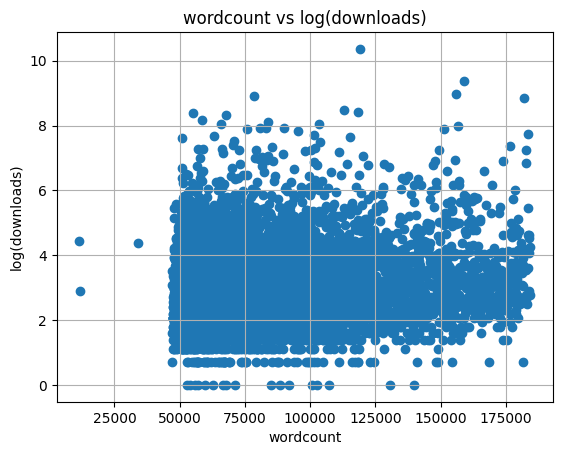

In [160]:
BookAvgDown = BookwithAttCopy.copy()
BookAvgDown.dropna(inplace=True)
BookAvgDown = BookAvgDown.sort_values(by ='speed')


plt.scatter(BookAvgDown['speed'], np.log(BookAvgDown['downloads']))
plt.title('Speed vs Downloads')
plt.xlabel('Speed')
plt.ylabel('Downloads')
plt.grid(True)
plt.show()


BookAvgDown = BookAvgDown.sort_values(by ='Slope')

plt.plot(BookAvgDown['Slope'], np.log(BookAvgDown['downloads']))
plt.title('Slope vs Downloads')
plt.xlabel('Slope')
plt.ylabel('Downloads')
plt.grid(True)
plt.show()

BookAvgDown = BookAvgDown.sort_values(by ='Average')


plt.scatter(BookAvgDown['Average'], np.log(BookAvgDown['downloads']))
plt.title('Average vs Downloads')
plt.xlabel('Average')
plt.ylabel('Downloads')
plt.grid(True)
plt.show()

plt.plot(BookAvgDown['Average'], BookAvgDown['speed'])
plt.title('Average vs Speed')
plt.xlabel('Average')
plt.ylabel('Speed')
plt.grid(True)
plt.show()


BookAvgDown1 = BookAvgDown[BookAvgDown['wordcount']< np.percentile(BookAvgDown['wordcount'], 95)]
BookAvgDown1 = BookAvgDown1.sort_values(by ='wordcount')
# plt.figure(figsize=(15,10))
plt.scatter(BookAvgDown1['wordcount'], np.log(BookAvgDown1['downloads']))
plt.title('wordcount vs log(downloads)')
plt.xlabel('wordcount',fontsize=10)

plt.ylabel('log(downloads)')
plt.grid(True)
plt.show()

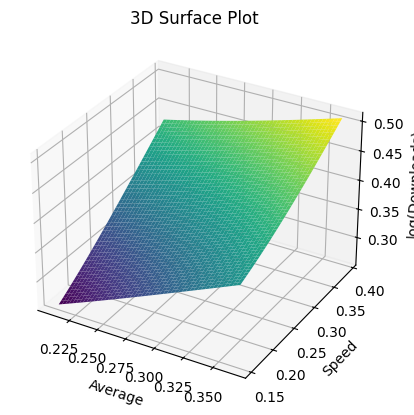

In [179]:
BookAvgDown2 = BookAvgDown[BookAvgDown['wordcount']< np.percentile(BookAvgDown['wordcount'], 75)]
x = BookAvgDown2['Average']
y = BookAvgDown2['speed']
z = BookAvgDown2['downloads']
# Create a 3D plot
fig = plt.figure()

# Scatter plot
# ax1 = fig.add_subplot(111, projection='3d')
# ax1.scatter(x, y, z)
# ax1.set_title('3D Scatter Plot')
# ax1.set_xlabel('X axis')
# ax1.set_ylabel('Y axis')
# ax1.set_zlabel('Z axis')

# Surface plot (for a surface plot, you need structured grid data)
# Here we generate a simple example for structured grid
x_surf = np.linspace(x.min(), x.max(), 50)
y_surf = np.linspace(y.min(), y.max(), 50)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = np.sin(np.sqrt(x_surf**2 + y_surf**2))  # Example function, replace with your z data if structured

ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_surface(x_surf, y_surf, z_surf, cmap='viridis')
ax2.set_title('3D Surface Plot')
ax2.set_xlabel('Average')
ax2.set_ylabel('Speed')
ax2.set_zlabel('log(Downloads)')

plt.show()

C:\Users\tejus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


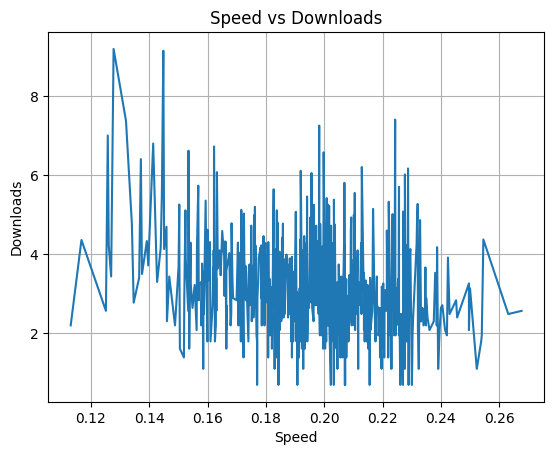

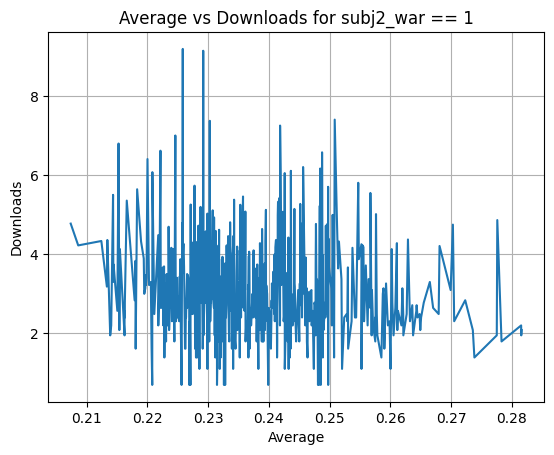

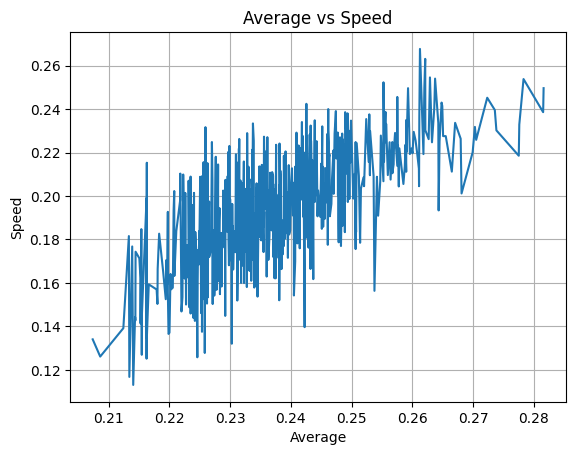

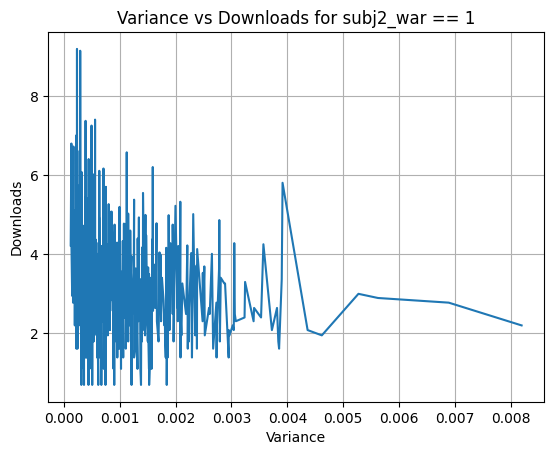

In [82]:
BookAvgDown = BookwithAttCopy[BookwithAttCopy['subj2_war'] == 1]
BookAvgDown = BookAvgDown.sort_values(by ='speed')


plt.plot(BookAvgDown['speed'], np.log(BookAvgDown['downloads']))
plt.title('Speed vs Downloads for subj2_war == 1')
plt.xlabel('Speed')
plt.ylabel('Downloads')
plt.grid(True)
plt.show()

BookAvgDown = BookAvgDown.sort_values(by ='Average')
plt.plot(BookAvgDown['Average'], np.log(BookAvgDown['downloads']))
plt.title('Average vs Downloads for subj2_war == 1')
plt.xlabel('Average')
plt.ylabel('Downloads')
plt.grid(True)
plt.show()

plt.plot(BookAvgDown['Average'], BookAvgDown['speed'])
plt.title('Average vs Speed for subj2_war == 1')
plt.xlabel('Average')
plt.ylabel('Speed')
plt.grid(True)
plt.show()

BookAvgDown = BookAvgDown.sort_values(by ='Variance')
plt.plot(BookAvgDown['Variance'], np.log(BookAvgDown['downloads']))
plt.title('Variance vs Downloads for subj2_war == 1')
plt.xlabel('Variance')
plt.ylabel('Downloads')
plt.grid(True)
plt.show()

In [83]:
BookwithAtt.dropna(axis=0, how='any', inplace=True)
featuresw = BookwithAtt[['Average', 'Variance', 'Slope', 'Skew', 'subj2_war', 'subj2_adventure', 'subj2_biography', 'subj2_romance', 'subj2_drama',
       'subj2_fantasy', 'subj2_family', 'subj2_sciencefiction', 'subj2_action'
       , 'subj2_western', 'subj2_horror', 'subj2_mystery',
       'subj2_crime', 'subj2_history', 'subj2_periodicals', 'subj2_others',
       'speed', 'sentiment_avg', 'sentiment_vol', 'wordcount']]

targets = np.log(BookwithAtt['downloads']+1)




In [84]:
X_train, X_test, y_train, y_test = train_test_split(featuresw, targets, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mean_squared_error', mse)
print('r2', r2)




mean_squared_error 1.118625603348656
r2 0.18132734449570298


In [85]:

reg = RandomForestRegressor(random_state=42)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mse', mse)
print('r2:', r2)


mse 1.1275245185618583
r2: 0.17481462162677242


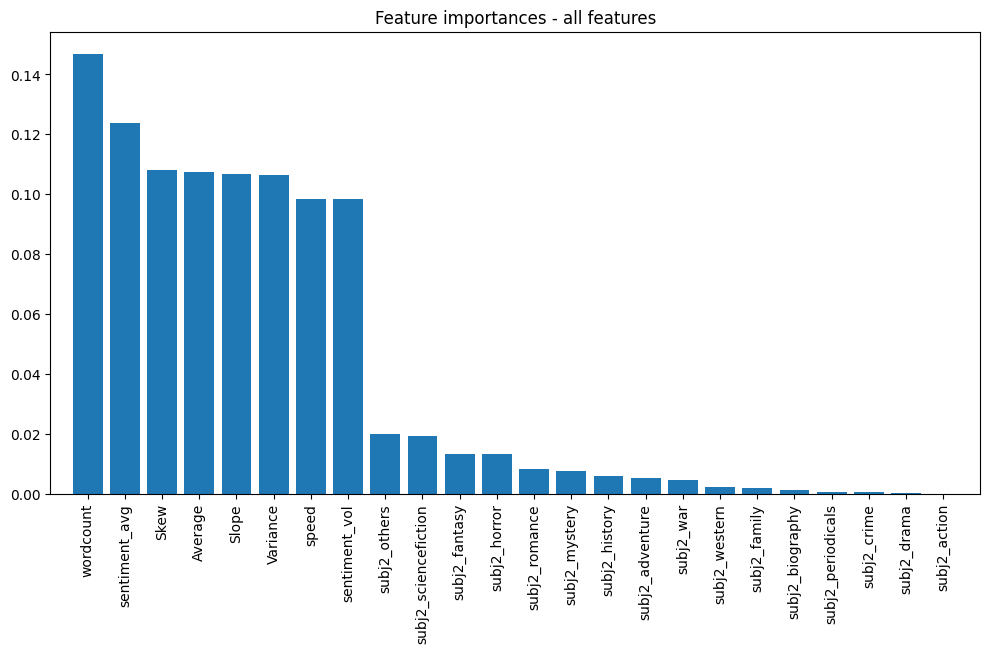

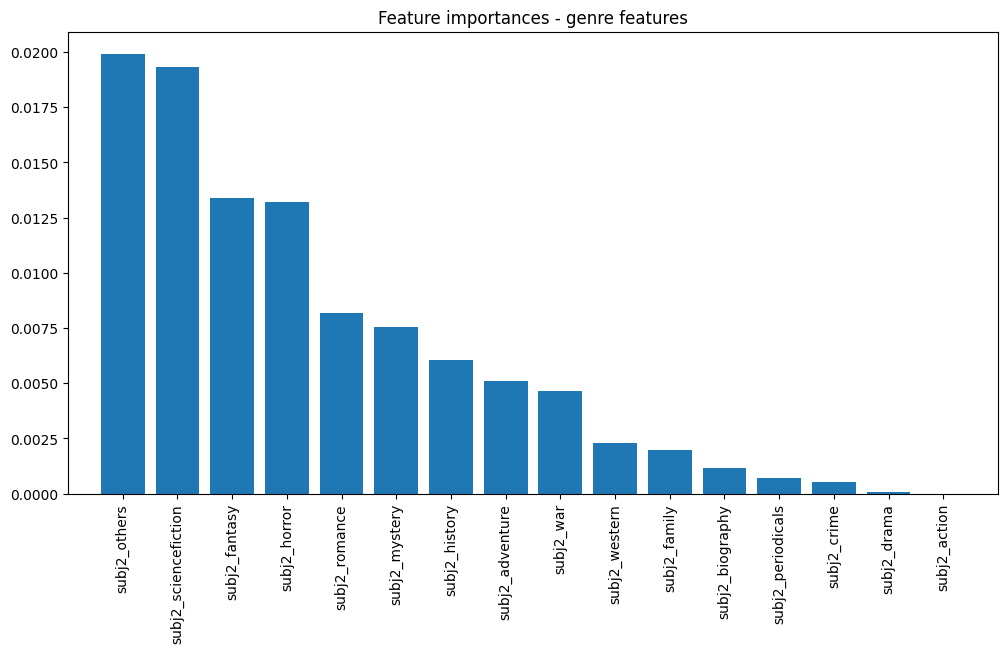

LASSO MSE: 1.116361319350428
LASSO R2: 0.18298447391245865
LASSO coefficients: [-0.         -0.         -0.04609578 -0.08196713 -0.00940423 -0.01887973
 -0.          0.0188598   0.          0.10256691  0.          0.12893321
 -0.          0.          0.10268487  0.03037787  0.         -0.
  0.01523187 -0.11270547 -0.0696753  -0.13274241  0.15154968  0.04553052]
LASSO analysis shows the most important variables are Slope, Skew, subj2_war, subj2_adventure, subj2_romance, subj2_fantasy, subj2_sciencefiction, subj2_horror, subj2_mystery, subj2_periodicals, subj2_others, speed, sentiment_avg, sentiment_vol, wordcount


In [86]:

genre_features = ['subj2_war', 'subj2_adventure', 'subj2_biography', 'subj2_romance', 'subj2_drama',
                  'subj2_fantasy', 'subj2_family', 'subj2_sciencefiction', 'subj2_action',
                  'subj2_western', 'subj2_horror', 'subj2_mystery', 'subj2_crime', 'subj2_history',
                  'subj2_periodicals', 'subj2_others']

importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances - all features")
plt.bar(range(len(featuresw.columns)), importances[indices], align="center")
plt.xticks(range(len(featuresw.columns)), featuresw.columns[indices], rotation=90)
plt.xlim([-1, len(featuresw.columns)])
plt.show()

genre_indices = [featuresw.columns.get_loc(f) for f in genre_features]
genre_importances = importances[genre_indices]
genre_sorted_indices = np.argsort(genre_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances - genre features")
plt.bar(range(len(genre_features)), genre_importances[genre_sorted_indices], align="center")
plt.xticks(range(len(genre_features)), np.array(genre_features)[genre_sorted_indices], rotation=90)
plt.xlim([-1, len(genre_features)])
plt.show()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(featuresw)


lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, targets)

lasso_coefs = lasso.coef_


y_pred_lasso = lasso.predict(scaler.transform(X_test))
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('LASSO MSE:', mse_lasso)
print('LASSO R2:', r2_lasso)
print('LASSO coefficients:', lasso.coef_)
print(f"LASSO analysis shows the most important variables are {', '.join([f for f, c in zip(featuresw.columns, lasso.coef_) if c != 0])}")


In [87]:
authormetrics = BookCopy.copy()
print(authormetrics['author'].value_counts())

author
Various                           717
Fenn, George Manville              85
Henty, G. A. (George Alfred)       82
Kingston, William Henry Giles      70
Anonymous                          61
                                 ... 
Arnold, Samuel James                1
Neville, Richard                    1
Porter, Linn Boyd                   1
Wagner, J. B. (Joseph Bernard)      1
Theobald, F. V.                     1
Name: count, Length: 7381, dtype: int64


In [107]:
test = BookwithAtt[BookwithAtt['author']=='Fenn, George Manville']

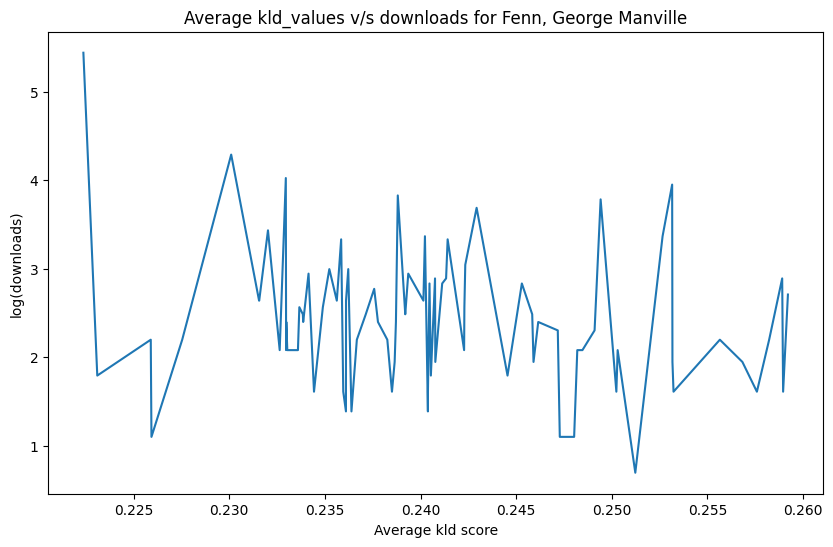

In [118]:
test = test.sort_values(by = 'Average')

austen_books = BookCopy[BookCopy['author'] == 'Fenn, George Manville']
austen_books = austen_books[['id','Average']]
austen_book = pd.merge(test,austen_books,left_on='id', right_on='id', how='inner')


sorted_austen_books = austen_book.sort_values(by='Average_y')
plt.figure(figsize=(10,6))
plt.title('Average kld_values v/s downloads for Fenn, George Manville')
plt.xlabel('Average kld score')
plt.ylabel('log(downloads)')
plt.plot(sorted_austen_books['Average_y'],np.log(test['downloads']))
plt.show()



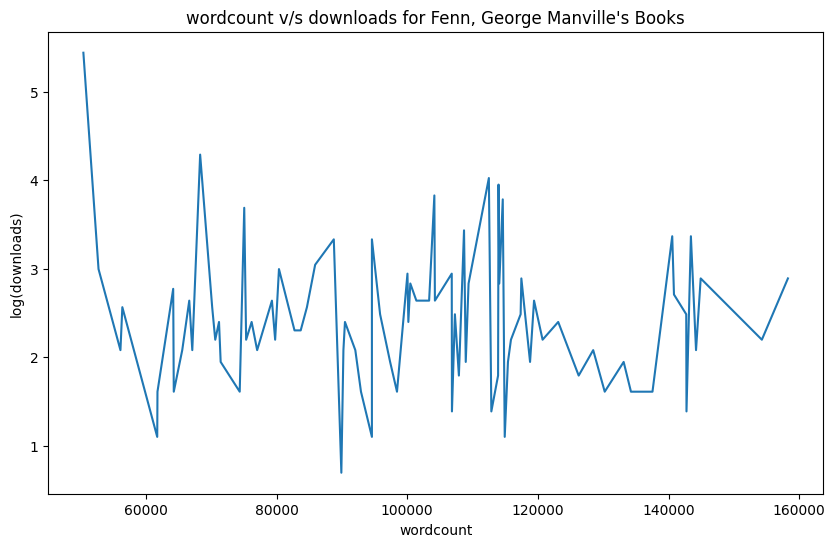

In [122]:

test = test.sort_values(by = 'speed')
BookCopy1 = pd.merge(BookCopy,BookAtt,on ='id',how='inner')
austen_books = BookCopy1[BookCopy1['author'] == 'Fenn, George Manville']

austen_books
austen_books = austen_books[['id','Average','speed','wordcount']]
austen_book = pd.merge(test,austen_books,left_on='id', right_on='id', how='inner')
austen_book.columns


sorted_austen_books = austen_book.sort_values(by='wordcount_y')
plt.figure(figsize=(10,6))
plt.title('wordcount v/s downloads for Fenn, George Manville\'s Books')
plt.xlabel('wordcount')
plt.ylabel('log(downloads)')
plt.plot(sorted_austen_books['wordcount_y'],np.log(test['downloads']))
plt.show()

